In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
data_titanic=pd.read_csv('C:/adsaada/titanic/titanic.csv')
data_titanic=data_titanic[['pclass','gender','age','survived']]

In [3]:
data_titanic.isnull().sum(),data_titanic['age'].isnull().sum()

(pclass        0
 gender        0
 age         263
 survived      0
 dtype: int64,
 np.int64(263))

dealing with the empty cell values

In [4]:
data_titanic.columns
data_titanic=data_titanic.dropna(subset=['gender','pclass','survived'])

In [189]:
data_titanic

,pclass,gender,age,survived
0,1,female,29.0000,1
1,1,male,0.9167,1
2,1,female,2.0000,0
3,1,male,30.0000,0
4,1,female,25.0000,0
...,...,...,...,...
1304,3,female,14.5000,0
1305,3,female,NaN,0
1306,3,male,26.5000,0
1307,3,male,27.0000,0


label encoding

changing string values to binary. preprocessig; label encodeing. convert male and female from gender to a numeric values


In [3]:
data_titanic['gender']=data_titanic['gender'].map({"male":1,'female':0})
data_titanic

#alternative--1
# data_titanic

#from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# convert_gen_to_num=le.fit_transform(data_titanic['gender'])
# convert_gen_to_num
# data_titanic.drop('gender',axis=1,inplace=True)

#Alternative---2
# data_titanic['gender']=data_titanic['gender'].apply(lambda x: 1 if x=='female' else 0 if x=='male' else -1)
data_titanic

#
# def gender_male_female(x):
#     if x=='male':
#         return 1
#     if x=='female':
#         return 0
#     else:
#         return -1

# data_titanic['gender']=data_titanic['gender'].apply(gender_male_female)
data_titanic



,pclass,gender,age,survived
0,1,0,29.0000,1
1,1,1,0.9167,1
2,1,0,2.0000,0
3,1,1,30.0000,0
4,1,0,25.0000,0
...,...,...,...,...
1304,3,0,14.5000,0
1305,3,0,NaN,0
1306,3,1,26.5000,0
1307,3,1,27.0000,0


In [6]:
data_titanic.info()
data_titanic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   gender    1309 non-null   int64  
 2   age       1046 non-null   float64
 3   survived  1309 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 41.0 KB


,pclass,gender,age,survived
count,1309.000000,1309.000000,1046.000000,1309.000000
mean,2.294882,0.644003,29.881135,0.381971
std,0.837836,0.478997,14.413500,0.486055
min,1.000000,0.000000,0.166700,0.000000
25%,2.000000,0.000000,21.000000,0.000000
50%,3.000000,1.000000,28.000000,0.000000
75%,3.000000,1.000000,39.000000,1.000000
max,3.000000,1.000000,80.000000,1.000000


handling empty cell

In [4]:
x=data_titanic['age'].mean()
x
data_titanic['age'].fillna(x,inplace=True)
# data_titanic
# data_titanic.isnull().sum()



C:\Users\dell\AppData\Local\Temp\ipykernel_13532\2613346536.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_titanic['age'].fillna(x,inplace=True)


In [7]:
data_titanic.describe()

,pclass,gender,age,survived
count,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.644003,29.881135,0.381971
std,0.837836,0.478997,12.883199,0.486055
min,1.000000,0.000000,0.166700,0.000000
25%,2.000000,0.000000,22.000000,0.000000
50%,3.000000,1.000000,29.881135,0.000000
75%,3.000000,1.000000,35.000000,1.000000
max,3.000000,1.000000,80.000000,1.000000


In [5]:
features=data_titanic[['pclass','gender','age']]
features
target=data_titanic['survived']
target.head()

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64

In [9]:
data_titanic['survived'].isnull().sum()

np.int64(0)

In [7]:
#another way using sklearn  

# from sklearn.impute import SimpleImputer
# imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
# features=imputer.fit_transform(features)
# features


spliting dataset into train and test

In [8]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=42)

In [9]:
features_train.isnull().sum()

pclass    0
gender    0
age       0
dtype: int64

In [10]:
target.ndim

1

In [11]:
features.ndim

2

trainning model

In [230]:
model=LogisticRegression()
model.fit(features_train,target_train)

LogisticRegression()

In [16]:
data_titanic.info()
data_titanic.describe()
data_titanic.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   gender    1309 non-null   int64  
 2   age       1309 non-null   float64
 3   survived  1309 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 41.0 KB


pclass      0
gender      0
age         0
survived    0
dtype: int64

In [232]:
prediction=model.predict(features_test)
model.predict_proba([[1,1,34]])

c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.61325859, 0.38674141]])

In [14]:
data_titanic.columns

Index(['pclass', 'gender', 'age', 'survived'], dtype='object')

In [15]:
import os
foldername="logistic_reg_titanic"
if not os.path.exists(foldername):
    os.mkdir(foldername)
    print("made")
else:
    print("alreday")


alreday


In [16]:
filename='logistic_reg_titanic/titanic_logistic_model1.sav'

In [19]:
import pickle

In [17]:
pickle.dump(model,open(filename,'wb'))

In [18]:
load=pickle.load(open(filename,'rb'))
result=load.predict_proba([[1,1,13]])
result
model.predict_proba(np.array([1,1,49]).reshape(-1,3))

c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.70886329, 0.29113671]])

In [19]:
predicative_data=[[1,1,34],[2,0,40],[3,0,50],[3,0,60]]
testing_prob=load.predict_proba(predicative_data)
for i,values in enumerate(predicative_data):
    print(f"{values} ,probability {testing_prob[i]}")

[1, 1, 34] ,probability [0.61325859 0.38674141]
[2, 0, 40] ,probability [0.29987088 0.70012912]
[3, 0, 50] ,probability [0.60549549 0.39450451]
[3, 0, 60] ,probability [0.67135269 0.32864731]


c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [24]:
data_titanic['gender']

0       0
1       1
2       0
3       1
4       0
       ..
1304    0
1305    0
1306    1
1307    1
1308    1
Name: gender, Length: 1309, dtype: int64

confusion  matrix

In [20]:
confuss_matrix=confusion_matrix(target_test,prediction)
confuss_matrix



array([[128,  16],
       [ 43,  75]])

In [21]:
# def test():
#  accuracy=(128+75)/(128+16+43+75)
#  return accuracy
# test()

# #accuracy
print(accuracy_score(target_test,prediction))

0.7748091603053435


In [21]:
from sklearn.metrics import classification_report
#classification report overall report
print(classification_report(target_test,prediction))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81       144
           1       0.82      0.64      0.72       118

    accuracy                           0.77       262
   macro avg       0.79      0.76      0.77       262
weighted avg       0.78      0.77      0.77       262



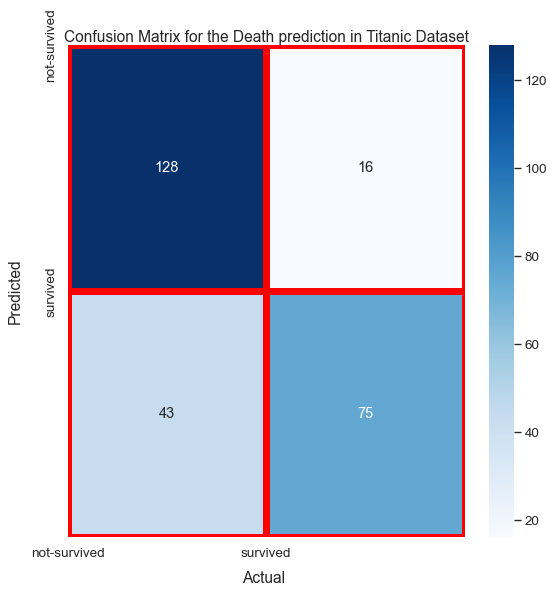

In [22]:
import seaborn as sns
 
# Change figure size and increase dpi for better resolution
plt.figure(figsize=(8,8), dpi=80)
# Scale up the size of all text
sns.set(font_scale = 1.1)
 
sns.heatmap(confuss_matrix, annot=True, fmt='d',cmap='Blues',linewidths=6,linecolor='red' )
plt.xlabel("Actual ", fontsize=14, labelpad=10)
plt.xticks(ticks=[1,0],labels=['survived', 'not-survived'])
plt.ylabel("Predicted", fontsize=14, labelpad=20)
plt.yticks(ticks=[1,0],labels=['survived', 'not-survived'])
plt.title("Confusion Matrix for the Death prediction in Titanic Dataset", fontsize=14, pad=2)
 
plt.show()

<h1> set input class gender age</h1> 

In [243]:
a=int(input("enter the class"))
print(f"class= {a}")
b=input("enter the  gender")
print(f"gender= {b}")
def gender(b):
    if b.lower()=="male":
        return 1
    if b.lower()=="female":
        return 0
    else:
        return -1
v=gender(b)
if v==-1:
    print(f"invalid input")
else:
    c=int(input('enter the age'))
    print(f" Age= {c}")
    predicative_data=[[a,v,c]]
    testing_prob=load.predict_proba(predicative_data)
    for i,values in enumerate(predicative_data):
        print(f"{values} ,probability for not-survival and survival {testing_prob[i]}")

class= 1
gender= female
 Age= 67
[1, 0, 67] ,probability for not-survival and survival [0.25608099 0.74391901]


c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [23]:
data_titanic


,pclass,gender,age,survived
0,1,0,29.000000,1
1,1,1,0.916700,1
2,1,0,2.000000,0
3,1,1,30.000000,0
4,1,0,25.000000,0
...,...,...,...,...
1304,3,0,14.500000,0
1305,3,0,29.881135,0
1306,3,1,26.500000,0
1307,3,1,27.000000,0


sasa

<h1> Logistic regression baesd on age,gender,class,marriage status,survived,embarked</h1> 

In [264]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [265]:
import os
from sklearn.metrics import classification_report
data_titanics=pd.read_csv('C:/adsaada/titanic/titanic.csv')

In [246]:
data_titanics.columns
data_titanics["embarked"].value_counts()

embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [266]:
def embarked_location(z):
    if z=='S':
        return 1
    if z=='C':
        return 2
    if z=='Q':
        return 3
    else:
        return 1
data_titanics['embarked']=data_titanics['embarked'].apply(embarked_location)


In [248]:
data_titanics['embarked'].value_counts()

embarked
1    916
2    270
3    123
Name: count, dtype: int64

In [95]:
data_titanics['name']

0                         Allen, Miss. Elisabeth Walton
1                        Allison, Master. Hudson Trevor
2                          Allison, Miss. Helen Loraine
3                  Allison, Mr. Hudson Joshua Creighton
4       Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
                             ...                       
1304                               Zabour, Miss. Hileni
1305                              Zabour, Miss. Thamine
1306                          Zakarian, Mr. Mapriededer
1307                                Zakarian, Mr. Ortin
1308                                 Zimmerman, Mr. Leo
Name: name, Length: 1309, dtype: object

#check marriage status

In [267]:

data_titanics['marriage_status']=data_titanics['name'].apply(lambda x: 1 if 'Mr' in  x else 1 if 'Mrs' in x else 0)


In [268]:
data_titanics.columns
data_titanics['marriage_status'].value_counts()

marriage_status
1    959
0    350
Name: count, dtype: int64

In [31]:
data_titanics['age'].isnull().sum()

np.int64(263)

In [269]:
from sklearn.impute import SimpleImputer

In [271]:
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
data_titanics[['age']]=imputer.fit_transform(data_titanics[['age']])

In [272]:
data_titanics['age']

0       29.000000
1        0.916700
2        2.000000
3       30.000000
4       25.000000
          ...    
1304    14.500000
1305    29.881135
1306    26.500000
1307    27.000000
1308    29.000000
Name: age, Length: 1309, dtype: float64

label encooding
changing gender into  numeric values

In [273]:
def gender_male_female (y):
    if y=='male':
        return 1
    if y=='female':
        return 0
data_titanics['gender']=data_titanics['gender'].apply(gender_male_female)

In [274]:
data_titanics['gender']


0       0
1       1
2       0
3       1
4       0
       ..
1304    0
1305    0
1306    1
1307    1
1308    1
Name: gender, Length: 1309, dtype: int64

Fill empty cell of age with the mean age

In [36]:
# from sklearn.impute import SimpleImputer
# imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
# data_titanics[['age']]=imputer.fit_transform(data_titanics[['age']])

In [37]:
data_titanics.isnull()
data_titanics.columns

Index(['pclass', 'survived', 'name', 'gender', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest',
       'marriage_status'],
      dtype='object')

In [62]:
data_titanics.isnull().sum()

pclass                0
survived              0
name                  0
gender                0
age                   0
sibsp                 0
parch                 0
ticket                0
fare                  1
cabin              1014
embarked              2
boat                823
body               1188
home.dest           564
marriage_status       0
dtype: int64

In [38]:
data_titanics
data_titanics['embarked']
data_titanics.isnull().sum()
data_titanics['embarked'].value_counts()


embarked
1    916
2    270
3    123
Name: count, dtype: int64

set missing 2 empty cell of embarked with max embarked location

In [104]:
data_titanics['embarked'].isnull().sum()

np.int64(0)

In [ ]:
data_titanics[['pclass','survived','gender','age','marriage_status','embarked']].isnull().value_counts()

set featured and target data

In [275]:
featured_data=data_titanics[['pclass','gender','age','marriage_status','embarked']]
target_data=data_titanics['survived']


In [151]:
featured_data,target_data

(      pclass  gender        age  marriage_status  embarked
 0          1       0  29.000000                0         1
 1          1       1   0.916700                0         1
 2          1       0   2.000000                0         1
 3          1       1  30.000000                1         1
 4          1       0  25.000000                1         1
 ...      ...     ...        ...              ...       ...
 1304       3       0  14.500000                0         2
 1305       3       0  29.881135                0         2
 1306       3       1  26.500000                1         2
 1307       3       1  27.000000                1         2
 1308       3       1  29.000000                1         1
 
 [1309 rows x 5 columns],
 0       1
 1       1
 2       0
 3       0
 4       0
        ..
 1304    0
 1305    0
 1306    0
 1307    0
 1308    0
 Name: survived, Length: 1309, dtype: int64)

split train test

In [276]:
featured_data_train,featured_data_test,target_data_train,target_data_test=train_test_split(featured_data,target_data,train_size=0.8,random_state=42)

model create

In [277]:
model=LogisticRegression()
model.fit(featured_data_train,target_data_train)

LogisticRegression()

In [45]:
data_titanics

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,marriage_status
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.000000,0,0,24160,211.3375,B5,1,2,NaN,"St Louis, MO",0
1,1,1,"Allison, Master. Hudson Trevor",1,0.916700,1,2,113781,151.5500,C22 C26,1,11,NaN,"Montreal, PQ / Chesterville, ON",0
2,1,0,"Allison, Miss. Helen Loraine",0,2.000000,1,2,113781,151.5500,C22 C26,1,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.000000,1,2,113781,151.5500,C22 C26,1,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.000000,1,2,113781,151.5500,C22 C26,1,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",0,14.500000,1,0,2665,14.4542,NaN,2,NaN,328.0,NaN,0
1305,3,0,"Zabour, Miss. Thamine",0,29.881135,1,0,2665,14.4542,NaN,2,NaN,NaN,NaN,0
1306,3,0,"Zakarian, Mr. Mapriededer",1,26.500000,0,0,2656,7.2250,NaN,2,NaN,304.0,NaN,1
1307,3,0,"Zakarian, Mr. Ortin",1,27.000000,0,0,2670,7.2250,NaN,2,NaN,NaN,NaN,1


set model in file

In [278]:
filenamed='logistic_reg_titanic/titanic_logistic_model_2.sav'
pickle.dump(model,open(filenamed,'wb'))

In [49]:
featured_data

,pclass,gender,age,marriage_status,embarked
0,1,0,29.000000,0,1
1,1,1,0.916700,0,1
2,1,0,2.000000,0,1
3,1,1,30.000000,1,1
4,1,0,25.000000,1,1
...,...,...,...,...,...
1304,3,0,14.500000,0,2
1305,3,0,29.881135,0,2
1306,3,1,26.500000,1,2
1307,3,1,27.000000,1,2


evaluate

In [279]:
prediction_target=model.predict(featured_data_test)
prediction_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1])

In [189]:
# data_titanics[(data_titanics['age']==29) & (data_titanics['pclass']==1)]
data_titanics.head(4)

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,marriage_status
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,1,2,NaN,"St Louis, MO",0
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,1,11,NaN,"Montreal, PQ / Chesterville, ON",0
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,1,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,1,NaN,135.0,"Montreal, PQ / Chesterville, ON",1


In [56]:
data_titanics.columns
featured_data.columns

Index(['pclass', 'gender', 'age', 'marriage_status', 'embarked'], dtype='object')

test

In [280]:
model.predict_proba([[1,0,29,0,1]])

c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.10736567, 0.89263433]])

In [57]:
featured_data_test

,pclass,gender,age,marriage_status,embarked
1148,3,1,35.000000,1,1
1049,3,1,20.000000,1,2
982,3,1,29.881135,1,1
808,3,1,29.881135,1,1
1195,3,1,29.881135,1,3
...,...,...,...,...,...
572,2,0,28.000000,1,1
140,1,1,23.000000,1,2
1182,3,0,21.000000,0,1
312,1,1,50.000000,1,2


<h2>confussion matrix</h2>

In [281]:
confussed_matrix=confusion_matrix(target_data_test,prediction_target)
confussed_matrix

array([[127,  17],
       [ 44,  74]])

accuracy score

In [282]:
accuracy_score(target_data_test,prediction_target)

0.767175572519084

classification report

In [283]:
from sklearn.metrics import classification_report
print(classification_report(target_data_test,prediction_target))

              precision    recall  f1-score   support

           0       0.74      0.88      0.81       144
           1       0.81      0.63      0.71       118

    accuracy                           0.77       262
   macro avg       0.78      0.75      0.76       262
weighted avg       0.77      0.77      0.76       262



heat map

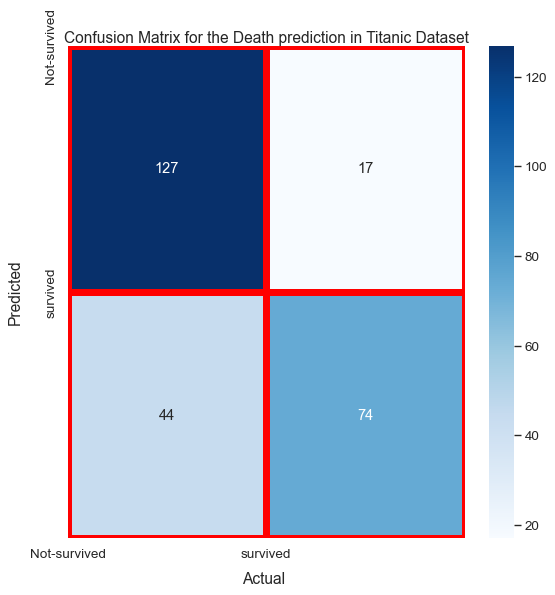

In [284]:
import seaborn as sns
 
# Change figure size and increase dpi for better resolution
plt.figure(figsize=(8,8), dpi=80)
# Scale up the size of all text
sns.set(font_scale = 1.1)
 
sns.heatmap(confussed_matrix, annot=True, fmt='d',cmap='Blues',linewidths=6,linecolor='red' )
plt.xlabel("Actual ", fontsize=14, labelpad=10)
plt.xticks(ticks=[0,1],labels=['Not-survived', 'survived'])
plt.ylabel("Predicted", fontsize=14, labelpad=20)
plt.yticks(ticks=[0,1],labels=['Not-survived', 'survived'])
plt.title("Confusion Matrix for the Death prediction in Titanic Dataset", fontsize=14, pad=2)
 
plt.show()

load save model and test

In [285]:
loadmodel2=pickle.load(open(filenamed,'rb'))
testing=loadmodel2.predict_proba([[1,1,23,1,1]])
testing
featured_data.columns

c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Index(['pclass', 'gender', 'age', 'marriage_status', 'embarked'], dtype='object')

Testing the user input data

In [289]:
C=int(input("enter the class  choose 1,2,3"))
print(f"class= {C}")
G=input("enter the  gender select male,female")
print(f"gender= {G}")
def gender(G):
    if G.lower()=="male":
        return 1
    if G.lower()=="female":
        return 0
    else:
        return -1
v=gender(G)
if v==-1:
    print(f"invalid input")
else:
    A=int(input('enter  the age'))
    print(f" Age= {A}")
    M=input("if married  yes else no")
    print(f"Married status {M}")
    def status_marriage(M):
        if M.lower()=="yes":
            return 1
        if M.lower()=="no":
            return 0
        else:
            return -1
    K=status_marriage(M)
    if K==-1:
        print("sorry")
    else:
        E=input('enter the location either S/C/Q')
        print(f"embarked  form {E}")
        def status_embarked(E):
            if E.upper()=="S":
                return 1
            if E.upper()=="C":
                return 2
            if E.upper()=="Q":
                return 3
            else:
                return 0
        EM=status_embarked(E)
        if EM==0:
            print("sorry")
        else:
            predicatived_datas=[[C,v,A,K,EM]]
            testing_probs=loadmodel2.predict_proba(predicatived_datas)
            for i,values in enumerate(predicatived_datas):
                print(f"{values} ,probability for not-survival and survival {testing_probs[i]}")

class= 1
gender= male
 Age= 34
Married status yes
embarked  form 1
[1, 1, 34, 1, 0] ,probability for not-survival and survival [0.69191042 0.30808958]


c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


cross validation

In [179]:
data_titanics

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,marriage_status
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.000000,0,0,24160,211.3375,B5,1,2,NaN,"St Louis, MO",0
1,1,1,"Allison, Master. Hudson Trevor",1,0.916700,1,2,113781,151.5500,C22 C26,1,11,NaN,"Montreal, PQ / Chesterville, ON",0
2,1,0,"Allison, Miss. Helen Loraine",0,2.000000,1,2,113781,151.5500,C22 C26,1,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.000000,1,2,113781,151.5500,C22 C26,1,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.000000,1,2,113781,151.5500,C22 C26,1,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",0,14.500000,1,0,2665,14.4542,NaN,2,NaN,328.0,NaN,0
1305,3,0,"Zabour, Miss. Thamine",0,29.881135,1,0,2665,14.4542,NaN,2,NaN,NaN,NaN,0
1306,3,0,"Zakarian, Mr. Mapriededer",1,26.500000,0,0,2656,7.2250,NaN,2,NaN,304.0,NaN,1
1307,3,0,"Zakarian, Mr. Ortin",1,27.000000,0,0,2670,7.2250,NaN,2,NaN,NaN,NaN,1


<h3>cross valuation</h3>

In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
cross_v_survived=cross_val_score(loadmodel2,featured_data,target_data,cv=10)
t=cross_v_survived.mean()
t

np.float64(0.7593482090428656)

<h3>hyperparameter cross-validation</h3>

In [58]:
from sklearn.model_selection import GridSearchCV
param_grid={"C":[0.0001,0.001,0.01,0.1],
            "penalty":['l2']

}
search_gris=GridSearchCV(estimator=LogisticRegression(),param_grid=param_grid,scoring='accuracy',cv=7,verbose=3)


set model

In [59]:
search_gris.fit(featured_data,target_data)


Fitting 7 folds for each of 4 candidates, totalling 28 fits
[CV 1/7] END ..............C=0.0001, penalty=l2;, score=0.615 total time=   0.0s
[CV 2/7] END ..............C=0.0001, penalty=l2;, score=0.615 total time=   0.0s
[CV 3/7] END ..............C=0.0001, penalty=l2;, score=0.615 total time=   0.0s
[CV 4/7] END ..............C=0.0001, penalty=l2;, score=0.620 total time=   0.0s
[CV 5/7] END ..............C=0.0001, penalty=l2;, score=0.620 total time=   0.0s
[CV 6/7] END ..............C=0.0001, penalty=l2;, score=0.620 total time=   0.0s
[CV 7/7] END ..............C=0.0001, penalty=l2;, score=0.620 total time=   0.0s
[CV 1/7] END ...............C=0.001, penalty=l2;, score=0.610 total time=   0.0s
[CV 2/7] END ...............C=0.001, penalty=l2;, score=0.615 total time=   0.0s
[CV 3/7] END ...............C=0.001, penalty=l2;, score=0.620 total time=   0.0s
[CV 4/7] END ...............C=0.001, penalty=l2;, score=0.620 total time=   0.0s
[CV 5/7] END ...............C=0.001, penalty=l2;,

GridSearchCV(cv=7, estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1], 'penalty': ['l2']},
             scoring='accuracy', verbose=3)

In [69]:
search_gris.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [70]:
search_gris.best_score_

np.float64(0.7295645530939648)

In [141]:
search_gris.best_estimator_

LogisticRegression(C=0.1)

evaluate and test

In [60]:
target_data_predict=search_gris.predict_proba(featured_data_test)
target_data_predict

array([[0.90659377, 0.09340623],
       [0.83801926, 0.16198074],
       [0.8944759 , 0.1055241 ],
       [0.8944759 , 0.1055241 ],
       [0.84193681, 0.15806319],
       [0.65395531, 0.34604469],
       [0.8816502 , 0.1183498 ],
       [0.77144291, 0.22855709],
       [0.85752925, 0.14247075],
       [0.16693952, 0.83306048],
       [0.8944759 , 0.1055241 ],
       [0.87045687, 0.12954313],
       [0.32876527, 0.67123473],
       [0.8944759 , 0.1055241 ],
       [0.90201522, 0.09798478],
       [0.37147901, 0.62852099],
       [0.87045687, 0.12954313],
       [0.45909716, 0.54090284],
       [0.22137345, 0.77862655],
       [0.88438321, 0.11561679],
       [0.43295323, 0.56704677],
       [0.57907279, 0.42092721],
       [0.87015348, 0.12984652],
       [0.59191448, 0.40808552],
       [0.84507455, 0.15492545],
       [0.3002584 , 0.6997416 ],
       [0.8264162 , 0.1735838 ],
       [0.41591969, 0.58408031],
       [0.33593029, 0.66406971],
       [0.18993248, 0.81006752],
       [0.

In [61]:
search_gris.predict_proba([[1,0,80,0,1]])

c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.34613632, 0.65386368]])

In [182]:
data_titanics

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,marriage_status
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.000000,0,0,24160,211.3375,B5,1,2,NaN,"St Louis, MO",0
1,1,1,"Allison, Master. Hudson Trevor",1,0.916700,1,2,113781,151.5500,C22 C26,1,11,NaN,"Montreal, PQ / Chesterville, ON",0
2,1,0,"Allison, Miss. Helen Loraine",0,2.000000,1,2,113781,151.5500,C22 C26,1,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.000000,1,2,113781,151.5500,C22 C26,1,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.000000,1,2,113781,151.5500,C22 C26,1,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",0,14.500000,1,0,2665,14.4542,NaN,2,NaN,328.0,NaN,0
1305,3,0,"Zabour, Miss. Thamine",0,29.881135,1,0,2665,14.4542,NaN,2,NaN,NaN,NaN,0
1306,3,0,"Zakarian, Mr. Mapriededer",1,26.500000,0,0,2656,7.2250,NaN,2,NaN,304.0,NaN,1
1307,3,0,"Zakarian, Mr. Ortin",1,27.000000,0,0,2670,7.2250,NaN,2,NaN,NaN,NaN,1


<h2>Naive bays</h2>

In [62]:
from sklearn.naive_bayes import GaussianNB

In [63]:
param_grid={"var_smoothing":[1e-9,1e-8,1e-7,1e-6,1e-5],
            "priors":[[0.3,0.7],[0.5,0.5]]}
naive_bayes_titanc=GridSearchCV(estimator=GaussianNB(),param_grid=param_grid,cv=10,scoring='accuracy')


In [64]:
naive_bayes_titanc.fit(featured_data,target_data)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'priors': [[0.3, 0.7], [0.5, 0.5]],
                         'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='accuracy')

In [65]:
k=naive_bayes_titanc.best_estimator_
print(k.class_count_)

[809. 500.]


<h1>make folder to save mode </h1>

In [ ]:
foldernames="Naive and decision"
if os.path.exists(foldernames):
    os.mkdir(foldernames)
    print("make it")
else:
    print("alread")

In [69]:
import pickle

<h1>save, load and test model</h1>

In [70]:
second_filename='Naive and decision/3rd_model_naive.sav'
pickle.dump(naive_bayes_titanc,open(second_filename,"wb"))

In [71]:
load_naive_titanic=pickle.load(open(second_filename,'rb'))

In [72]:
predtcited_target_test=naive_bayes_titanc.predict(featured_data_test)
predtcited_target_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1])

<h2>check classification_report, confusion matrix, </h2>

In [73]:

print(classification_report(predtcited_target_test,target_data_test))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       152
           1       0.69      0.75      0.72       110

    accuracy                           0.76       262
   macro avg       0.75      0.75      0.75       262
weighted avg       0.76      0.76      0.76       262



In [74]:
accuracy_score(predtcited_target_test,target_data_test)

0.7557251908396947

In [75]:
confusion_matrix_naive_titanic=confusion_matrix(predtcited_target_test,target_data_test)
confusion_matrix_naive_titanic

array([[116,  36],
       [ 28,  82]])

<Axes: >

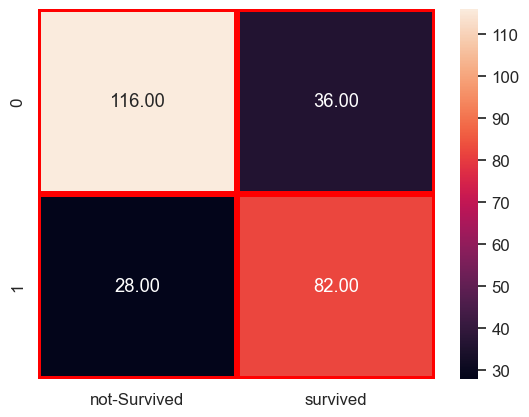

In [81]:
sns.heatmap(confusion_matrix_naive_titanic,annot=True,fmt=".2f",linewidths=3,linecolor='red',xticklabels=["not-Survived","survived"])

<h2>testmodel for naive bayes</h2>

In [82]:
featured_data
naive_bayes_titanc.predict_proba([[1,0,29,1,1]])

c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([[0.06778232, 0.93221768]])

hyperparameter cv model test

In [123]:
loadmodel2.predict_proba([[1,0,29,1,1]])

c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.12274862, 0.87725138]])

model test 1st 

In [124]:
model.predict_proba([[1,0,29,1,1]])

c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.12274862, 0.87725138]])

<h2>Decison tree<h2>

In [83]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams

In [84]:
param_grid={
    "criterion":['gini','entropy'],
    "splitter":['best','random'],
    "max_depth":[5,10,15],
    "min_samples_split":[2,4,10],
    "min_samples_leaf":[1,2,4],
    "random_state":[42],
    "min_impurity_decrease": [0.0, 0.01, 0.05],
    "max_features": [None, "sqrt", "log2", 5]
}

In [86]:
DecisionTree_titanic=GridSearchCV(estimator=DecisionTreeClassifier(),cv=5,scoring='accuracy',param_grid=param_grid,verbose=2)
DecisionTree_titanic.fit(featured_data,target_data)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
[CV] END criterion=gini, max_depth=5, max_features=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, random_state=42, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, random_state=42, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, random_state=42, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, random_state=42, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, random_state=42, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=None

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15],
                         'max_features': [None, 'sqrt', 'log2', 5],
                         'min_impurity_decrease': [0.0, 0.01, 0.05],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 10], 'random_state': [42],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=2)

In [87]:
DecisionTree_titanic.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_impurity_decrease': 0.01,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': 42,
 'splitter': 'best'}

In [88]:
DecisionTree_titanic.score(featured_data,target_data)

0.7906799083269671

In [89]:
prediction_target_decision=DecisionTree_titanic.predict(featured_data_test)

Save the model in file sav

In [90]:
FileName='Naive and decision/Decision_tree_titanic_model.sav'
pickle.dump(DecisionTree_titanic,open(FileName,'wb'))

load model

In [91]:
test_decisiontree_titanic=pickle.load(open(FileName,'rb'))
test_decisiontree_titanic.predict(featured_data_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1])

In [226]:
print(classification_report(prediction_target_decision,target_data_test))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80       164
           1       0.65      0.79      0.71        98

    accuracy                           0.76       262
   macro avg       0.75      0.77      0.76       262
weighted avg       0.78      0.76      0.77       262



In [92]:
accuracy_score(prediction_target_decision,target_data_test)

0.7633587786259542

In [93]:
confu_matrix_titanic_decision=confusion_matrix(prediction_target_decision,target_data_test)
confu_matrix_titanic_decision

array([[123,  41],
       [ 21,  77]])

<h1>decison tree diagram</h1>

In [94]:
from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams

In [95]:
tree_diag=DecisionTreeClassifier()
tree_diag.fit(featured_data_train,target_data_train)

DecisionTreeClassifier()

[Text(0.3684593023255814, 0.9705882352941176, 'x[1] <= 0.5\ngini = 0.463\nsamples = 1047\nvalue = [665, 382]'),
 Text(0.1602577804377565, 0.9117647058823529, 'x[0] <= 2.5\ngini = 0.409\nsamples = 370\nvalue = [106, 264]'),
 Text(0.2643585413816689, 0.9411764705882353, 'True  '),
 Text(0.049247606019151846, 0.8529411764705882, 'x[0] <= 1.5\ngini = 0.124\nsamples = 195\nvalue = [13, 182]'),
 Text(0.01094391244870041, 0.7941176470588235, 'x[2] <= 8.0\ngini = 0.068\nsamples = 113\nvalue = [4, 109]'),
 Text(0.005471956224350205, 0.7352941176470589, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.016415868673050615, 0.7352941176470589, 'x[2] <= 24.5\ngini = 0.052\nsamples = 112\nvalue = [3, 109]'),
 Text(0.01094391244870041, 0.6764705882352942, 'gini = 0.0\nsamples = 28\nvalue = [0, 28]'),
 Text(0.02188782489740082, 0.6764705882352942, 'x[2] <= 25.5\ngini = 0.069\nsamples = 84\nvalue = [3, 81]'),
 Text(0.01094391244870041, 0.6176470588235294, 'x[4] <= 1.5\ngini = 0.5\nsamples = 2\nvalue 

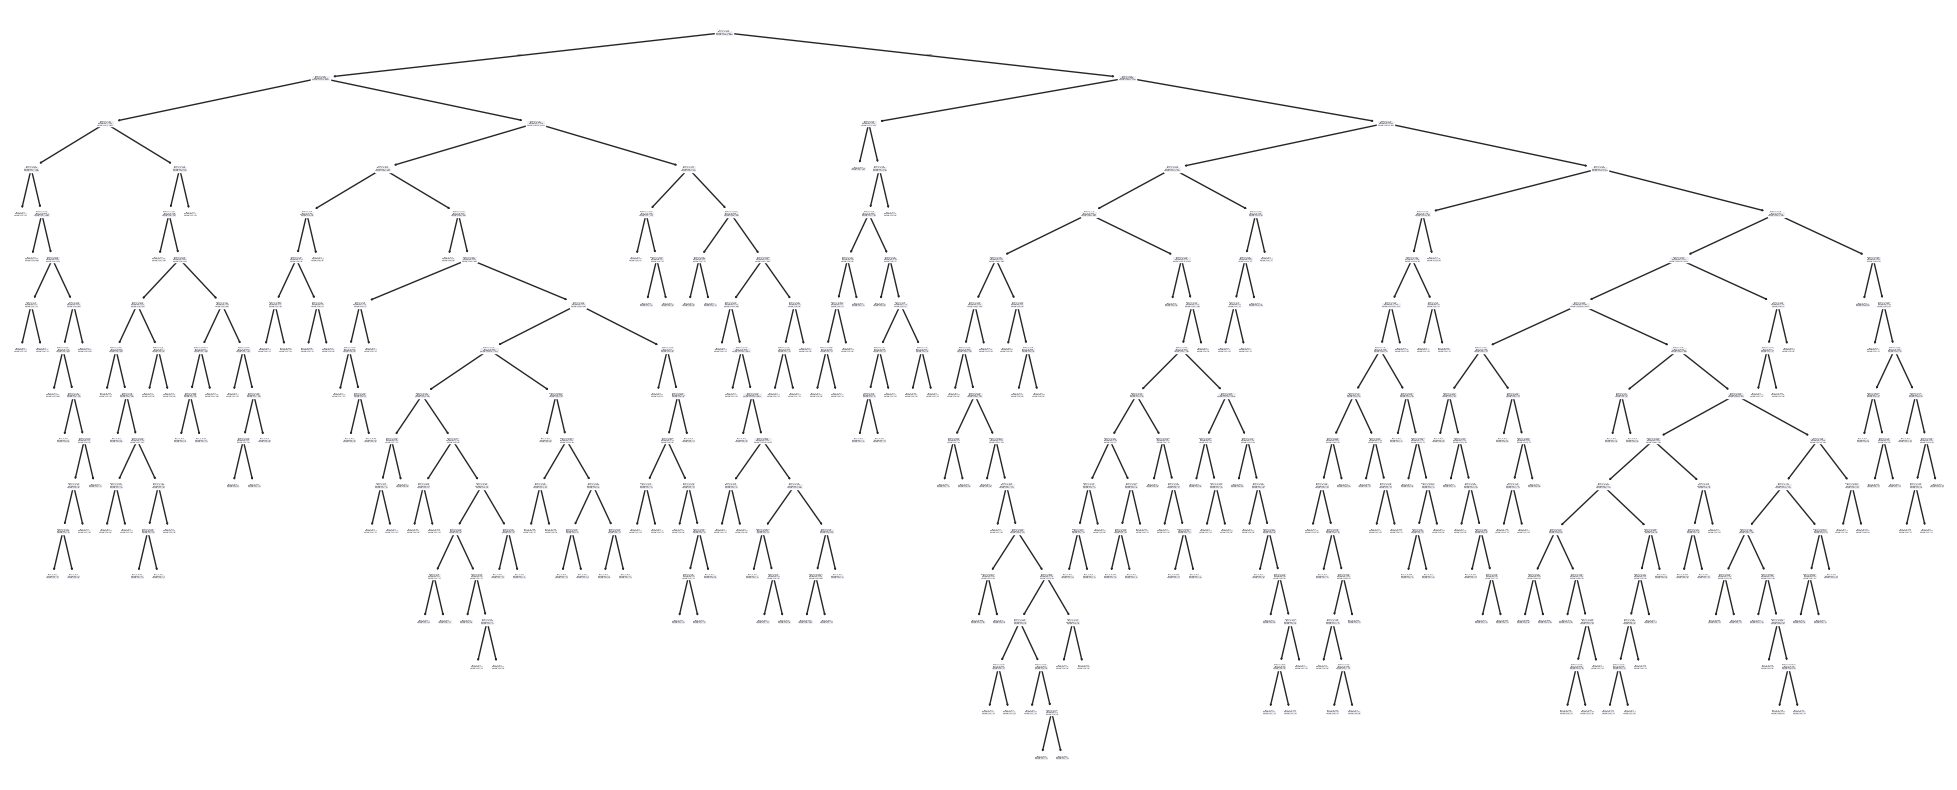

In [213]:
rcParams['figure.figsize'] = 25,10
plot_tree(tree_diag)

test

In [102]:
DecisionTree_titanic.predict([[2,1,39,0,2]])
DecisionTree_titanic.predict_proba([[2,1,39,0,2]])



c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0.83, 0.17]])

<h1></h1>

<h1>Random Forest</h1>

In [103]:
from sklearn.ensemble import RandomForestClassifier

set model

In [105]:
RF_titanic=RandomForestClassifier()
RF_titanic.fit(featured_data_train,target_data_train)

RandomForestClassifier()

evaluate

In [106]:
RF_target_train=RF_titanic.predict(featured_data_test)

In [111]:
randon_F_titanic=RandomForestClassifier(max_samples=0.5,random_state=42)
randon_F_titanic.fit(featured_data_train,target_data_train)
RF_2_target_train=RF_titanic.predict(featured_data_test)


In [113]:
accuracy_score(RF_2_target_train,target_data_test),accuracy_score(RF_target_train,target_data_test)

(0.7519083969465649, 0.7519083969465649)

In [115]:
print(classification_report(RF_target_train,target_data_test))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79       169
           1       0.62      0.78      0.69        93

    accuracy                           0.75       262
   macro avg       0.74      0.76      0.74       262
weighted avg       0.78      0.75      0.76       262



Cross valuation

In [124]:
from sklearn.model_selection import cross_val_score

In [128]:
np.mean(cross_val_score(RF_titanic,featured_data,target_data,cv=5))
 

np.float64(0.6607996256324764)

<h1> hyperparameter</h1> 

In [158]:
param_grid={
    "n_estimators":[6,8],
    "criterion":['gini','entropy'],
    'max_depth':[6,8],
    'max_features':['sqrt','log2'],
    'min_samples_split':[4,6],
    'min_samples_leaf':[4,8],
    'min_impurity_decrease':[0.1,0.03]

}
Hyper_titanic=GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid,cv=5,scoring='accuracy',verbose=3)
Hyper_titanic

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'min_impurity_decrease': [0.1, 0.03],
                         'min_samples_leaf': [4, 8],
                         'min_samples_split': [4, 6], 'n_estimators': [6, 8]},
             scoring='accuracy', verbose=3)

In [159]:
Hyper_titanic.fit(featured_data,target_data)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV 1/5] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=4, min_samples_split=4, n_estimators=6;, score=0.618 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=4, min_samples_split=4, n_estimators=6;, score=0.618 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=4, min_samples_split=4, n_estimators=6;, score=0.618 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=4, min_samples_split=4, n_estimators=6;, score=0.618 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=4, min_samples_split=4, n_estimators=6;, score=0.732 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_featur

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'min_impurity_decrease': [0.1, 0.03],
                         'min_samples_leaf': [4, 8],
                         'min_samples_split': [4, 6], 'n_estimators': [6, 8]},
             scoring='accuracy', verbose=3)

In [180]:
hy_target_pre=Hyper_titanic.predict(featured_data_test)

testing the model

In [160]:
Hyper_titanic.best_params_,Hyper_titanic.best_estimator_,Hyper_titanic.best_score_

({'criterion': 'gini',
  'max_depth': 8,
  'max_features': 'log2',
  'min_impurity_decrease': 0.1,
  'min_samples_leaf': 8,
  'min_samples_split': 4,
  'n_estimators': 8},
 RandomForestClassifier(max_depth=8, max_features='log2',
                        min_impurity_decrease=0.1, min_samples_leaf=8,
                        min_samples_split=4, n_estimators=8),
 np.float64(0.7799479395162471))

In [166]:
Hyper_titanic.predict_proba(np.array([1,1,29,1,1]).reshape(-1,5))

c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.75788376, 0.24211624]])

[3, 0, 78, 1, 3] for survival predict for survive not survived [0.35873078 0.64126922]
[3, 1, 78, 1, 3] for survival predict for survive not survived [0.75788376 0.24211624]
[1, 1, 29, 1, 1] for survival predict for survive not survived [0.75788376 0.24211624]
[1, 0, 29, 1, 1] for survival predict for survive not survived [0.35873078 0.64126922]


c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Confusion matrix

In [182]:
con_hy_matrix=confusion_matrix(target_data_test,hy_target_pre)
con_hy_matrix

array([[123,  21],
       [ 43,  75]])

<h1>Heat map</h1>

<Axes: >

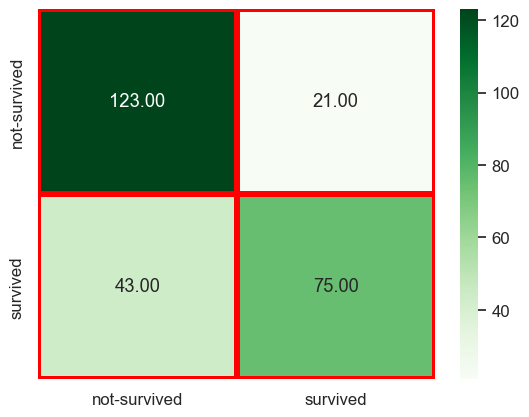

In [194]:
sns.heatmap(con_hy_matrix,annot=True,fmt=".2f",cmap='Greens',xticklabels=["not-survived",'survived'],yticklabels=["not-survived",'survived'],linewidths=3,linecolor="red")

Testing the model

In [195]:
testing_hy_titanc=[[3,0,78,1,3],[3,1,78,1,3],[1,1,29,1,1],[1,0,29,1,1]]
predict_titanic_hype=Hyper_titanic.predict_proba(testing_hy_titanc)
for i,values in enumerate(testing_hy_titanc):
    print(f"{values} for survival predict for survive not survived {predict_titanic_hype[i]}")


[3, 0, 78, 1, 3] for survival predict for survive not survived [0.35873078 0.64126922]
[3, 1, 78, 1, 3] for survival predict for survive not survived [0.75788376 0.24211624]
[1, 1, 29, 1, 1] for survival predict for survive not survived [0.75788376 0.24211624]
[1, 0, 29, 1, 1] for survival predict for survive not survived [0.35873078 0.64126922]


c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import os

In [ ]:
FOLDER="RandomForest"
if os.path.exists(FOLDER):
    os.mkdir(FOLDER)
    print('makde')
else:
    print("already")


In [238]:
FILENAME='RandomForest/Random_tree_hyp.sav'
pickle.dump(Hyper_titanic,open(FILENAME,'wb'))

In [240]:
model2_RF=pickle.load(open(FILENAME,'rb'))
model2_RF.predict_proba([[1,1,23,0,1]])

c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.75788376, 0.24211624]])

In [290]:
C=int(input("enter the class  choose 1,2,3"))
print(f"class= {C}")
G=input("enter the  gender select male,female")
print(f"gender= {G}")
def gender(G):
    if G.lower()=="male":
        return 1
    if G.lower()=="female":
        return 0
    else:
        return -1
v=gender(G)
if v==-1:
    print(f"invalid input")
else:
    A=int(input('enter  the age'))
    print(f" Age= {A}")
    M=input("if married  yes else no")
    print(f"Married status {M}")
    def status_marriage(M):
        if M.lower()=="yes":
            return 1
        if M.lower()=="no":
            return 0
        else:
            return -1
    K=status_marriage(M)
    if K==-1:
        print("sorry")
    else:
        def status_embarked(E):
            if E.upper()=="S":
                return 1
            if E.upper()=="C":
                return 2
            if E.upper()=="Q":
                return 3
            else:
                return 0
        E=input('enter the location either S/C/Q')
        print(f"embarked  form {E}")
        EM=status_embarked(E)
        if EM==0:
            print("sorry")
        else:
            predicatived_data_hyp=[[C,v,A,K,EM]]
            HY_testing_probs=model2_RF.predict_proba(predicatived_data_hyp)
            for j,value in enumerate(predicatived_data_hyp):
                print(f"{value} ,probability for not-survival and survival {HY_testing_probs[j]}")

class= 1
gender= male
 Age= 23
Married status yes
embarked  form 3
[1, 1, 23, 1, 0] ,probability for not-survival and survival [0.75788376 0.24211624]


c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
